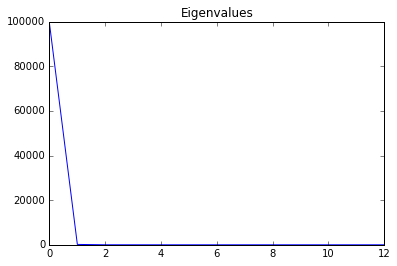

In [1]:
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression as PLS
import numpy as np
%matplotlib inline

df = pd.read_csv("wine.data.txt", sep=",", skipinitialspace=True, skiprows=0, header=None).as_matrix()
x = df[:,1:]
Y = df[:,0]
covr = np.cov(x.T)
w,v = np.linalg.eig(covr)
w,v = zip(*sorted(zip(w, v),reverse=True))
# eigenvalue plot
plt.plot(np.arange(len(w)),w)
plt.title("Eigenvalues")
plt.show()

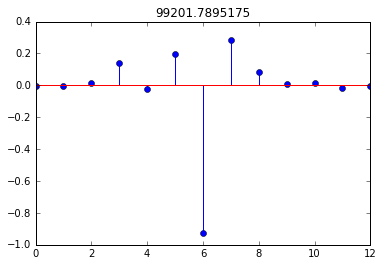

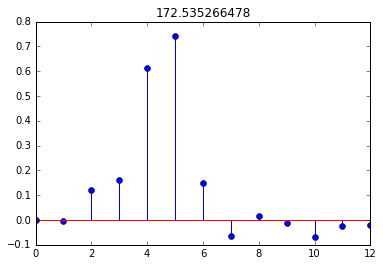

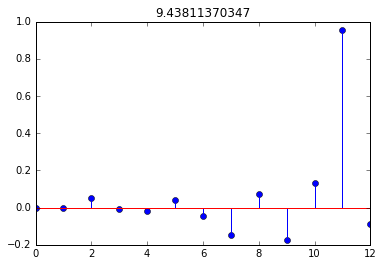

In [2]:
# first 3 pc
for i in range(3):
    eigenv = w[i]
    y = v[i]
    x = np.arange(len(y))
    plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.title(eigenv)
    plt.show()

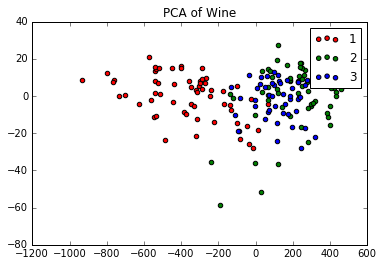

In [3]:
x = df[:,1:]
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)
target_names = [1,2,3]
for c, i, target_name in zip("rgb", target_names, target_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of Wine')
plt.show()